In [202]:
import pandas as pd

df = pd.read_csv('hepatitis.csv', header=None, sep=',')
print(df)
X = df.iloc[:,:19]
y = df.iloc[:,19]

     0   1   2   3   4   5   6   7   8   9   10  11  12   13     14     15  \
0    30   2   1   2   2   2   2   1   2   2   2   2   2  1.0   85.0   18.0   
1    50   1   1   2   1   2   2   1   2   2   2   2   2  0.9  135.0   42.0   
2    78   1   2   2   1   2   2   2   2   2   2   2   2  0.7   96.0   32.0   
3    31   1   2   1   2   2   2   2   2   2   2   2   2  0.7   46.0   52.0   
4    34   1   2   2   2   2   2   2   2   2   2   2   2  1.0   86.5  200.0   
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...    ...    ...   
150  46   1   2   2   1   1   1   2   2   2   1   1   1  7.6  104.5  242.0   
151  44   1   2   2   1   2   2   2   1   2   2   2   2  0.9  126.0  142.0   
152  61   1   1   2   1   1   2   1   1   2   1   2   2  0.8   75.0   20.0   
153  53   2   1   2   1   2   2   2   2   1   1   2   1  1.5   81.0   19.0   
154  43   1   2   2   1   2   2   2   2   1   1   1   2  1.2  100.0   19.0   

      16    17  18  19  
0    4.0   2.0   1   2  
1    3.5  30.

In [203]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [213]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X, y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [214]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [215]:
from sklearn.model_selection import cross_val_score
neighScores = cross_val_score(neigh, X, y, cv=3)
nbScores = cross_val_score(nb, X, y, cv=3)
treeScores = cross_val_score(tree, X, y, cv=3)

[0.69230769 0.78846154 0.60784314]
[0.84615385 0.82692308 0.49019608]
[0.76923077 0.80769231 0.54901961]


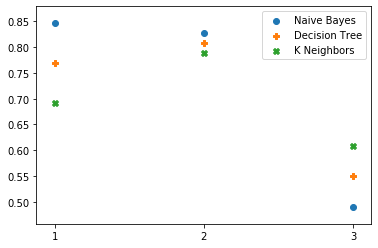

In [216]:
print(neighScores)
print(nbScores)
print(treeScores)

import matplotlib.pyplot as plt
kNeighGraph = neighScores
nbGraph = nbScores
treeGraph = treeScores
activity = ["1", "2", "3"]

fig, ax = plt.subplots()
ax.scatter(activity, nbGraph, label="Naive Bayes", marker="o")
ax.scatter(activity, treeGraph, label="Decision Tree", marker="P")
ax.scatter(activity, kNeighGraph, label="K Neighbors", marker="X")
ax.legend()

plt.show()

In [217]:
#El mejor algoritmo es el de Naive Bayes porque en todas las iteraciones se comporto 
#de manera mas constante y con buena puntuacion
from statistics import mean
neighAccuracy = mean(neighScores)
nbAccuracy = mean(nbScores)
treeAccuracy = mean(treeScores)
print('K Neighbors ->',neighAccuracy)
print('Naive Bayes ->', nbAccuracy)
print('Decision tree ->',treeAccuracy)

K Neighbors -> 0.6962041226747109
Naive Bayes -> 0.7210910005027652
Decision tree -> 0.7086475615887381


In [218]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.333, random_state=0)

clf = GaussianNB()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

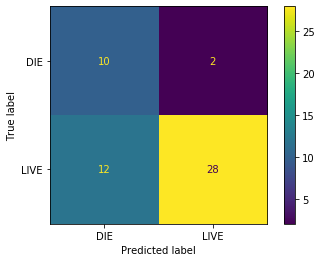

In [219]:
cm = confusion_matrix(y_test, predictions, labels=[1, 2])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["DIE","LIVE"])
disp.plot()

In [220]:
from sklearn.metrics import precision_score, f1_score, recall_score, accuracy_score
precision = precision_score(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

In [221]:
print('Accuracy ->', accuracy)
print('Precision ->', precision)
print('Recall ->', recall)
print('F1 Score ->', f1)

Accuracy -> 0.7307692307692307
Precision -> 0.45454545454545453
Recall -> 0.8333333333333334
F1 Score -> 0.5882352941176471
